# Task 2: Customer Segmentation Using Unsupervised Learning

---

## 1. Problem Statement

Businesses often struggle to understand different types of customers and their spending behaviors. Treating all customers the same leads to ineffective marketing strategies and lower customer engagement.

Customer segmentation helps businesses divide customers into meaningful groups based on purchasing patterns and demographics. By identifying distinct customer segments, companies can design personalized marketing strategies, improve customer satisfaction, and increase revenue.

---

## 2. Objective

The objective of this project is to perform customer segmentation using unsupervised machine learning techniques. The goal is to identify distinct customer groups based on income and spending behavior and propose targeted marketing strategies for each segment.

Key goals:

* Perform Exploratory Data Analysis (EDA)
* Apply K-Means clustering to segment customers
* Use PCA for dimensionality reduction and visualization
* Interpret clusters and derive business insights
* Suggest marketing strategies for each segment

---

## 3. Dataset Description

The dataset used in this project is the **Mall Customers Dataset**, which contains basic demographic and spending information about customers visiting a shopping mall.

### Features:

* CustomerID → Unique ID for each customer
* Gender → Male/Female
* Age → Age of customer
* Annual Income (k$) → Income in thousand dollars
* Spending Score (1-100) → Mall assigned score based on customer behavior

---



## 4. Import Libraries
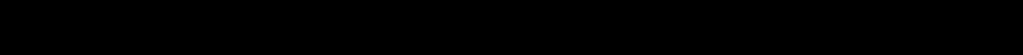
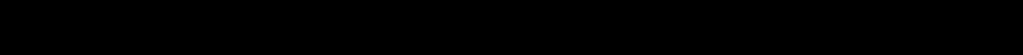
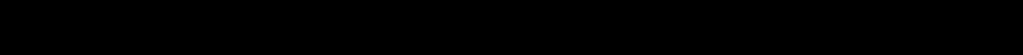

In [18]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



## 5. Load Dataset

In [5]:
df = pd.read_excel("C:/Users/Aqsaamalik/Desktop/DataScience&AnalystInternship/Mall Customers.xlsx")
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


#### Dataset Overview

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 6. Exploratory Data Analysis (EDA)

#### Gender Distribution

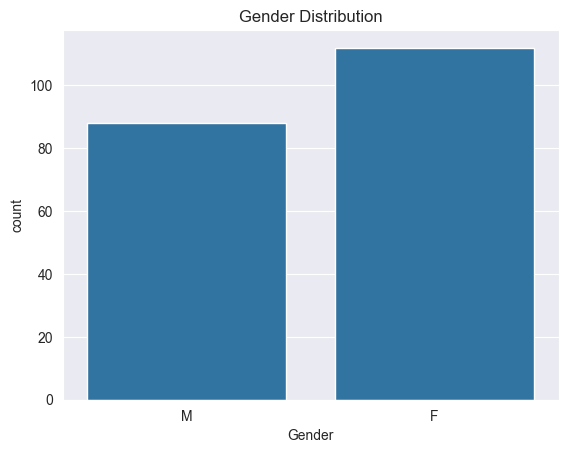

In [7]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

#### Age Distribution

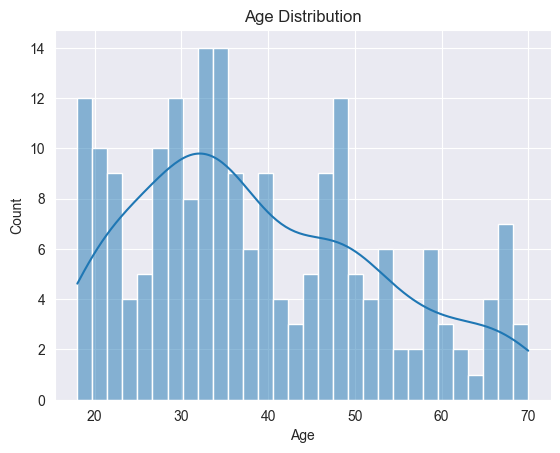

In [8]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

#### Income vs Spending Score

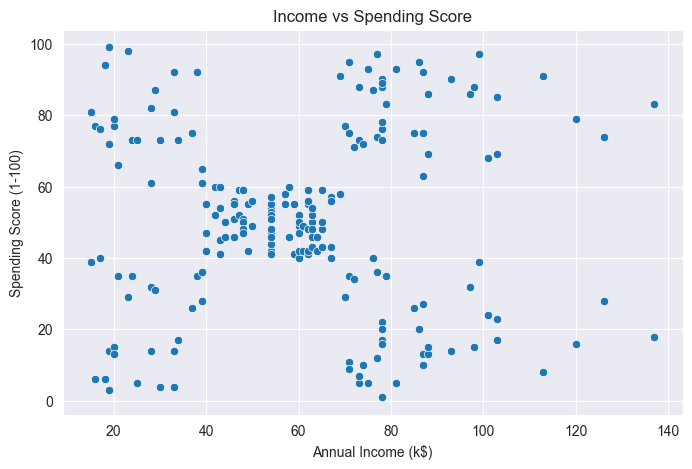

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Income vs Spending Score")
plt.show()

## 7. Data Preprocessing

#### Select Relevant Features
We use income and spending score for clustering.

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#### Feature Scaling

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 8. Finding Optimal Clusters (Elbow Method)

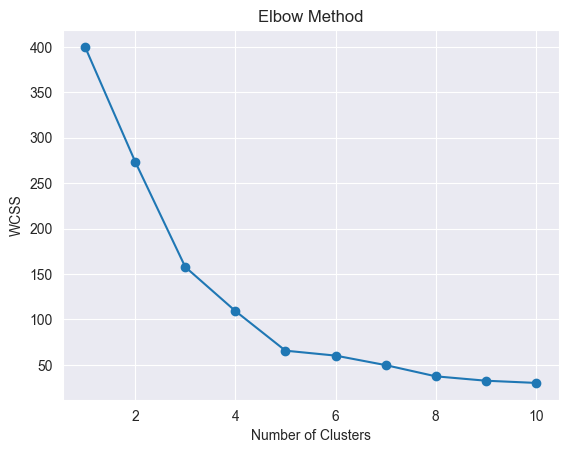

In [12]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Interpretation: The elbow point suggests the optimal number of clusters (usually around 5).

## 9. Apply K-Means Clustering

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## 10. Visualizing Clusters

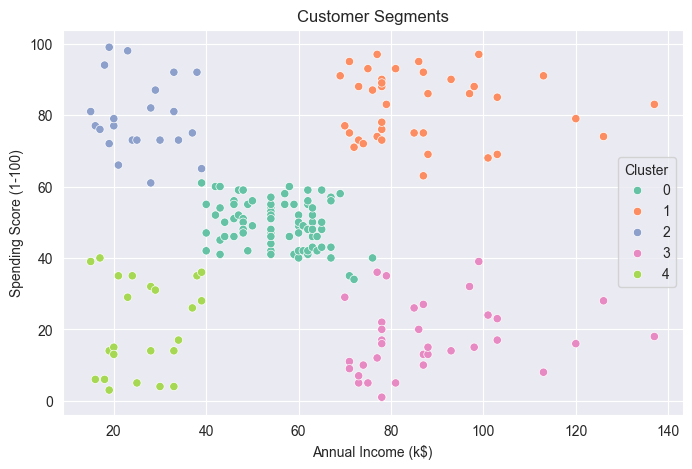

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    data=df
)
plt.title("Customer Segments")
plt.show()

## 11. PCA for Cluster Visualization

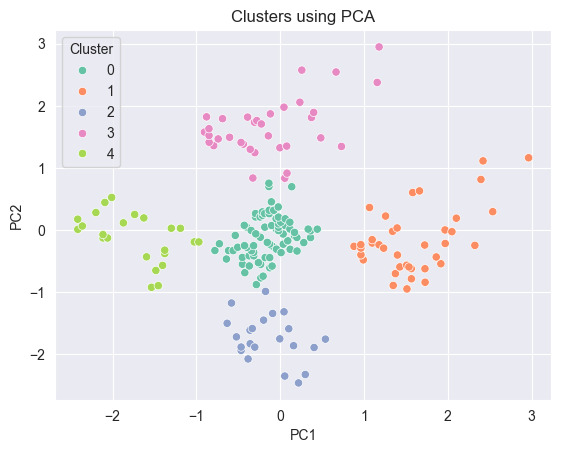

In [16]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
plt.title("Clusters using PCA")
plt.show()

## 12. t-SNE Visualization

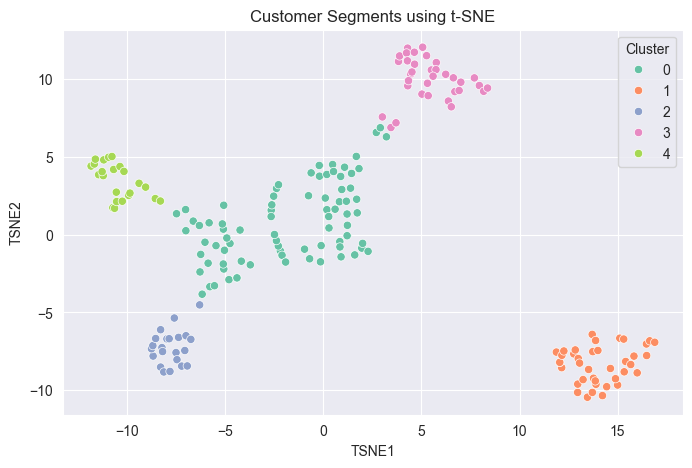

In [19]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_features = tsne.fit_transform(X_scaled)

# Create dataframe
tsne_df = pd.DataFrame(tsne_features, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = df['Cluster']

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='Set2',
    data=tsne_df
)
plt.title("Customer Segments using t-SNE")
plt.show()


t-SNE provides a non-linear dimensionality reduction technique that often reveals more compact and visually separable clusters compared to PCA.

## 13. Cluster Analysis

In [17]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


This helps interpret the behavior of each segment.

## 14. Business Insights & Marketing Strategies
#### Cluster 0 — High Income, High Spending
Premium customers

Strategy: VIP programs, luxury promotions

#### Cluster 1 — High Income, Low Spending

Potential customers

Strategy: Personalized offers, loyalty programs

#### Cluster 2 — Average Income, Average Spending

Regular customers

Strategy: Discounts and bundle deals

#### Cluster 3 — Low Income, High Spending

Impulse buyers

Strategy: Limited-time offers, flash sales

#### Cluster 4 — Low Income, Low Spending

Budget customers

Strategy: Affordable product lines, value deals

## 15. Results

Successfully segmented customers into meaningful groups

K-Means effectively captured spending behavior patterns

PCA visualization improved interpretability

Identified high-value and low-engagement customer segments

## 16. Conclusion

In this project, we applied unsupervised learning techniques to segment customers based on income and spending behavior. K-Means clustering helped identify distinct customer groups, and PCA enabled better visualization of cluster separation.

These insights can help businesses design targeted marketing strategies, improve customer engagement, and optimize revenue generation.

## 17. Future Improvements

Use more features for deeper segmentation

Try hierarchical clustering

Apply t-SNE visualization

Build real-time recommendation system